In [1]:
import numpy as np
import galsim
import galsim.lsst
import jiffy

import matplotlib.pyplot as plt
%matplotlib inline

/Users/schneider42/local/galsim/lsst/lsst_wcs.py:38: UserWarning: You cannot use the LSST module.
You either do not have the LSST stack installed,
or you have it installed, but have not set it up.
------------
To install the LSST stack, follow the instructions at:

	https://confluence.lsstcorp.org/display/SIM/Catalogs+and+MAF

NOTE: Make sure that you use the same version of python to install
the LSST stack as you do to build GalSim (or vice-versa).  See
	https://github.com/GalSim-developers/GalSim/wiki/Building-GalSim-with-the-LSST-stack
for more details

------------
If you have installed the stack, run

If you installed from source:
	source $LSST_HOME/loadLSST.bash
	setup obs_lsstSim -t sims

If you installed the binary (conda) distribution:
	source eups-setups.sh
	setup obs_lsstSim

These commands setup the LSST package management system EUPS and then tell EUPS to setup the package that contains the model of the LSST camera.  For an explanation of what EUPS is and how it works, see

In [2]:
# Read LSST nominal coefficients
dat = galsim.lsst.lsst_psfs._read_aberrations()
# npupil = int(np.max(dat[:, 0]))
# nfield = int(np.max(dat[:, 2]))
npupil = 57
nfield = 29

In [3]:
print dat.shape
print dat[0:10,:]

(109, 5)
[[ 2.          0.          2.          0.          0.23113484]
 [ 2.          2.          4.          2.         -0.09443532]
 [ 2.          0.          0.          0.         -0.13235281]
 [ 4.          0.          2.          0.         -0.12582651]
 [ 3.          3.          3.          3.          0.06807902]
 [ 3.          1.          1.          1.         -0.06762354]
 [ 6.          0.          0.          0.          0.07907768]
 [ 5.          1.          1.          1.          0.05214373]
 [ 8.          0.          0.          0.         -0.06537855]
 [ 3.          1.          3.          1.          0.03813519]]


In [114]:
# Make a lookup table
noll_tab = np.zeros((59, 2), dtype=int)
for j in range(59):
    n, m = galsim.phase_screens._noll_to_zern(j)
    noll_tab[j, :] = [n, m]

def get_noll_index(n, m):
    return np.where((noll_tab == (n, m)).all(axis=1))[0][0]
    
jp_max = 0
jf_max = 0
aberrations = np.zeros((npupil, nfield), dtype=np.float64)
for i in xrange(dat.shape[0]):
    n_pupil = int(dat[i, 0])
    m_pupil = int(dat[i, 1])
    n_field = int(dat[i, 2])
    m_field = int(dat[i, 3])
    
#     j_pupil = get_noll_index(n_pupil, m_pupil)
#     j_field = get_noll_index(n_field, m_field)
#     aberrations[j_pupil, j_field] = dat[i, 4]
    
    for mp in [-m_pupil, m_pupil]:
        j_pupil = get_noll_index(n_pupil, mp)
        jp_max = np.max((jp_max, j_pupil))
        for mf in [-m_field, m_field]:
            j_field = get_noll_index(n_field, mf)
            jf_max = np.max((jf_max, j_field))
            #
            aberrations[j_pupil, j_field] = dat[i, 4]

In [115]:
print jp_max, jf_max

56 28


In [116]:
for i in xrange(dat.shape[0]):
    jp = get_noll_index(dat[i,0], -dat[i,1])
    jf = get_noll_index(dat[i,2], dat[i,3])
    print dat[i,1], dat[i,3], dat[i,4], aberrations[jp, jf]

0.0 0.0 0.23113484 0.23113484
2.0 2.0 -0.09443532 -0.09443532
0.0 0.0 -0.13235281 -0.13235281
0.0 0.0 -0.12582651 -0.12582651
3.0 3.0 0.06807902 0.06807902
1.0 1.0 -0.06762354 -0.06762354
0.0 0.0 0.07907768 0.07907768
1.0 1.0 0.05214373 0.05214373
0.0 0.0 -0.06537855 -0.06537855
1.0 1.0 0.03813519 0.03813519
1.0 1.0 -0.03655939 -0.03655939
0.0 0.0 -0.04600754 -0.04600754
1.0 1.0 0.01643176 0.01643176
2.0 2.0 0.01588653 0.01588653
0.0 0.0 0.02015844 0.02015844
3.0 3.0 -0.01424397 -0.01424397
0.0 0.0 0.0199 0.0199
1.0 1.0 -0.01179766 -0.01179766
2.0 2.0 0.01105129 0.01105129
2.0 2.0 -0.00876696 -0.00876696
2.0 2.0 0.0071078 0.0071078
2.0 2.0 0.00689156 0.00689156
0.0 0.0 -0.00893325 -0.00893325
0.0 0.0 0.00646739 0.00646739
3.0 3.0 0.00306412 0.00306412
1.0 1.0 0.00261086 0.00261086
0.0 0.0 0.00306868 0.00306868
4.0 4.0 -0.00180046 -0.00180046
2.0 2.0 0.00152473 0.00152473
0.0 0.0 0.00186951 0.00186951
2.0 2.0 -0.00087366 -0.00087366
0.0 0.0 -0.00092896 -0.00092896
4.0 4.0 -0.0006038 -0.

In [117]:
print noll_tab

[[ 0  0]
 [ 0  0]
 [ 1  1]
 [ 1 -1]
 [ 2  0]
 [ 2 -2]
 [ 2  2]
 [ 3 -1]
 [ 3  1]
 [ 3 -3]
 [ 3  3]
 [ 4  0]
 [ 4  2]
 [ 4 -2]
 [ 4  4]
 [ 4 -4]
 [ 5  1]
 [ 5 -1]
 [ 5  3]
 [ 5 -3]
 [ 5  5]
 [ 5 -5]
 [ 6  0]
 [ 6 -2]
 [ 6  2]
 [ 6 -4]
 [ 6  4]
 [ 6 -6]
 [ 6  6]
 [ 7 -1]
 [ 7  1]
 [ 7 -3]
 [ 7  3]
 [ 7 -5]
 [ 7  5]
 [ 7 -7]
 [ 7  7]
 [ 8  0]
 [ 8  2]
 [ 8 -2]
 [ 8  4]
 [ 8 -4]
 [ 8  6]
 [ 8 -6]
 [ 8  8]
 [ 8 -8]
 [ 9  1]
 [ 9 -1]
 [ 9  3]
 [ 9 -3]
 [ 9  5]
 [ 9 -5]
 [ 9  7]
 [ 9 -7]
 [ 9  9]
 [ 9 -9]
 [10  0]
 [10 -2]
 [10  2]]


In [118]:
print np.min(aberrations), np.max(aberrations)

-0.13235281 0.23113484


/Users/schneider42/Envs/mbi/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,u'Pupil index')

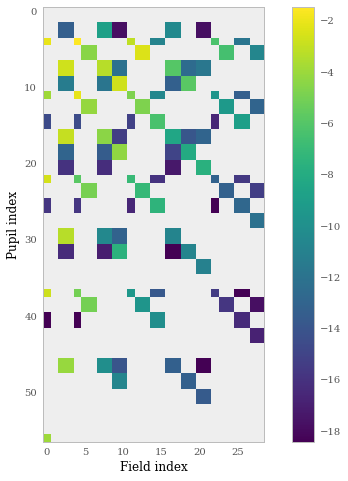

In [119]:
plt.figure(figsize=(10,8))
# plt.imshow(aberrations)
plt.imshow(np.log(np.abs(aberrations)))
plt.colorbar()
plt.xlabel(r"Field index")
plt.ylabel(r"Pupil index")

## Compare to non-field-dependent OpticalScreen

In [120]:
theta = (1.75*60.*galsim.arcmin, 0.0*galsim.arcmin)

In [121]:
psf3 = jiffy.GalsimPSFLSST()
img3 = psf3.get_model(theta=theta, with_atmos=False).drawImage(nx=64, ny=64)

In [122]:
fov_radius = 1.75 * galsim.degrees

a = galsim.OpticalScreenField(aberrations, diam=8.4, fov_radius=fov_radius).getAberrations(theta[0].tan(), theta[1].tan())
screen1 = galsim.OpticalScreen(diam=8.4, aberrations=a)

screen2 = galsim.OpticalScreenField(diam=8.4, a_nmrs=aberrations, fov_radius=fov_radius)

psf1 = galsim.PhaseScreenList(screen1).makePSF(diam=8.4, lam=500.0,
                                              theta=theta)
psf2 = galsim.PhaseScreenList(screen2).makePSF(diam=8.4, lam=500.0,
                                              theta=theta)

img1 = psf1.drawImage(nx=64, ny=64)
img2 = psf2.drawImage(nx=64, ny=64)

(64, 64)


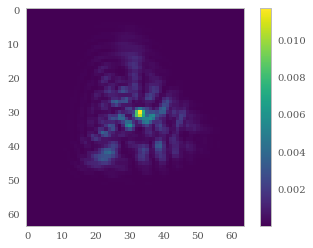

In [123]:
print img1.array.shape
plt.imshow(img1.array)
plt.colorbar()

(64, 64)


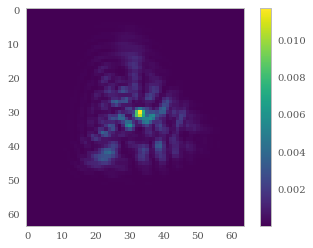

In [124]:
print img2.array.shape
plt.imshow(img2.array)
plt.colorbar()

(64, 64)


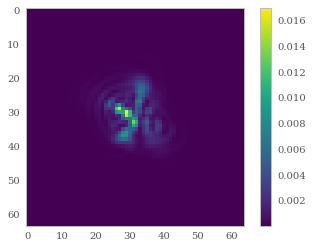

In [125]:
print img3.array.shape
plt.imshow(img3.array)
plt.colorbar()

## Explore Zernike evaluations in GalSim

In [108]:
fov_radius = 1.75 * galsim.degrees
theta = (1.75*60.*galsim.arcmin, 0.0*galsim.arcmin)
print theta[0].tan(), theta[1].tan()

0.0305527632986 0.0


In [109]:
a = galsim.OpticalScreenField(aberrations, diam=8.4, 
                              fov_radius=fov_radius).getAberrations(theta[0].tan(), theta[1].tan())
# print np.array(a).ravel()

for j in xrange(1,npupil):
    print "{:d} {:9.8f}".format(j, a[j])

1 0.00000000
2 -0.00032000
3 -0.00032000
4 0.30244369
5 -0.26594584
6 -0.26594584
7 -0.01828311
8 -0.01828311
9 0.20322207
10 0.20322207
11 -0.23817955
12 0.01082720
13 0.01082720
14 -0.00623439
15 -0.00623439
16 0.07011174
17 0.07011174
18 -0.04141249
19 -0.04141249
20 -0.00162062
21 -0.00162062
22 0.00324324
23 0.01465409
24 0.01465409
25 -0.00189903
26 -0.00189903
27 0.00002095
28 0.00002095
29 -0.07311877
30 -0.07311877
31 0.00143499
32 0.00143499
33 -0.00005785
34 -0.00005785
35 0.00000000
36 0.00000000
37 0.01103285
38 0.01666056
39 0.01666056
40 -0.00013601
41 -0.00013601
42 -0.00000019
43 -0.00000019
44 0.00000000
45 0.00000000
46 0.03273309
47 0.03273309
48 0.00005854
49 0.00005854
50 -0.00000447
51 -0.00000447
52 0.00000000
53 0.00000000
54 0.00000000
55 0.00000000
56 0.00000000


In [129]:
print screen2.coef_arrays[2]

[[ 0.00000000e+00+0.00000000e+00j  1.17539417e-03-1.17539417e-03j
   0.00000000e+00+0.00000000e+00j -5.65685425e-08+5.65685425e-08j
   0.00000000e+00+0.00000000e+00j -6.92820323e-08+6.92820323e-08j
   0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -2.58646526e-03+2.58646526e-03j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.09119201e-03-1.09119201e-03j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]]


In [70]:
noll_coef = galsim.phase_screens._noll_coef_array(nfield-1, 0.0, False)

In [71]:
print noll_coef.shape

(4, 7, 28)


In [72]:
coef_arrays = [np.dot(noll_coef, a[1:]) for a in aberrations]

In [74]:
print aberrations.shape
print np.array(coef_arrays).shape

(57, 29)
(57, 4, 7)


In [76]:
coef_arrays[2]

array([[ 0.00000000e+00+0.00000000e+00j,  1.17539417e-03-1.17539417e-03j,
         0.00000000e+00+0.00000000e+00j, -5.65685425e-08+5.65685425e-08j,
         0.00000000e+00+0.00000000e+00j, -6.92820323e-08+6.92820323e-08j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j, -2.58646526e-03+2.58646526e-03j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  1.09119201e-03-1.09119201e-03j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.0